In [1]:
import matplotlib.pyplot as plt
import parse_access_om2_results as par
import plot_access_om2_scaling as pas
import plot_pandas_data as ppd
import plot_right_axis_time as pra
from convert_time import days_to_gregorian_years, gregorian_years_to_days

In [2]:
df = par.parse_om2_dataframe("../access-om2/archive")
df_bw = df[df["nodesize"] == 28]
df_cl = df[df["nodesize"] == 48]

In [3]:
ocean_cice_ratio_middle = 7

In [4]:
const_ice_nbr_blocks = 5767

In [5]:
high_ice_ncpus = df_cl[df_cl["ocean_ncpus"] / df_cl["ice_ncpus"] <= ocean_cice_ratio_middle]
low_ice_ncpus = df_cl[df_cl["ocean_ncpus"] / df_cl["ice_ncpus"] > ocean_cice_ratio_middle]
bw_hi = df_bw[df_bw["ocean_ncpus"] / df_bw["ice_ncpus"] <= ocean_cice_ratio_middle]
bw_lo = df_bw[df_bw["ocean_ncpus"] / df_bw["ice_ncpus"] > ocean_cice_ratio_middle]

In [6]:
df_bw

,nodesize,ice_from_ocn,ice_nbr_blocks,ice_ncpus,ocean_ncpus,om2_ncpus,om2_nbr_time_steps,om2_timestep,om2_walltime,om2_simulated_time,...,ocean_cpu_time per step,ocean_om2_cpu_time per step,Ice speed per cpu,Ocean speed per cpu,OM2 speed,OM2 speed per cpu,relative ice_from_ocn,relative ocean_oasis_recv,relative wait,wait relative to walltime
4,28,14.34,1547,399,4358,4780,4480,540,5019.268072,2419200,...,2122.342502,2327.856163,1.264045,0.254436,481.982625,0.100833,0.002990,1.134113,0.356629,0.495829
17,28,59.05,1547,399,2240,2640,4480,540,5021.379584,2419200,...,2160.744787,2546.592071,1.255949,0.249914,481.779949,0.182492,0.012232,0.083935,0.046100,0.083996


In [7]:
df[(df["ocean_ncpus"] == 2240) & (df["ice_ncpus"] == 399) & (df["ice_nbr_blocks"] == 1547)]

,nodesize,ice_from_ocn,ice_nbr_blocks,ice_ncpus,ocean_ncpus,om2_ncpus,om2_nbr_time_steps,om2_timestep,om2_walltime,om2_simulated_time,...,ocean_cpu_time per step,ocean_om2_cpu_time per step,Ice speed per cpu,Ocean speed per cpu,OM2 speed,OM2 speed per cpu,relative ice_from_ocn,relative ocean_oasis_recv,relative wait,wait relative to walltime
7,48,246.82,1547,399,2240,2640,4480,540,4637.762852,2419200,...,2082.724263,2454.639311,1.383051,0.259276,521.630811,0.197587,0.056301,0.019641,0.03844,0.070860
17,28,59.05,1547,399,2240,2640,4480,540,5021.379584,2419200,...,2160.744787,2546.592071,1.255949,0.249914,481.779949,0.182492,0.012232,0.083935,0.04610,0.083996


In [8]:
df[(df["ocean_ncpus"] == 4358) & (df["ice_ncpus"] == 399) & (df["ice_nbr_blocks"] == 1547)]

,nodesize,ice_from_ocn,ice_nbr_blocks,ice_ncpus,ocean_ncpus,om2_ncpus,om2_nbr_time_steps,om2_timestep,om2_walltime,om2_simulated_time,...,ocean_cpu_time per step,ocean_om2_cpu_time per step,Ice speed per cpu,Ocean speed per cpu,OM2 speed,OM2 speed per cpu,relative ice_from_ocn,relative ocean_oasis_recv,relative wait,wait relative to walltime
4,28,14.34,1547,399,4358,4780,4480,540,5019.268072,2419200,...,2122.342502,2327.856163,1.264045,0.254436,481.982625,0.100833,0.002990,1.134113,0.356629,0.495829
9,48,14.30,1547,399,4358,4780,4480,540,4705.041332,2419200,...,2044.945551,2242.964602,1.522550,0.264066,514.171891,0.107567,0.003591,0.814463,0.283750,0.366938
10,48,12.15,1547,399,4358,4780,4480,540,4187.135826,2419200,...,2052.917943,2251.708988,1.549174,0.263040,577.769650,0.120872,0.003104,0.776763,0.274132,0.394404
11,48,13.00,1547,399,4358,4780,4480,540,4142.511378,2419200,...,2004.765599,2198.893888,1.574090,0.269358,583.993568,0.122174,0.003375,0.796351,0.279767,0.399321


In [9]:
low_ncpus_const_blocks = low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] == const_ice_nbr_blocks]
low_ncpus_var_blocks = low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] != const_ice_nbr_blocks]

In [10]:
def plot_ice_block_comparison(plot_fn, x, data,
        xticks=[], 
        yticks=[],
        right_axis_fn=pra.no_right_axis,
        right_yticks=[],
        format_str="{:g}",
        marker='+'):
    if xticks == []:
        xticks = data[x].sort_values().unique()
    xtick_labels = [str(int(val)) for val in xticks]
    fig, ax = plt.subplots()
    plots = []
    plots.append(plot_fn(high_ice_ncpus, marker=marker))
    plots.append(plot_fn(low_ncpus_const_blocks, marker=marker))
    plots.append(plot_fn(low_ncpus_var_blocks, marker=marker))
    plt.xticks(xticks, xtick_labels, rotation=45)
    ax.set_xticks([], minor=True)
    if yticks != []:
        ytick_labels = [str(val) for val in yticks]
        plt.yticks(yticks, ytick_labels)
        ax.set_yticks([], minor=True)
    right_axis = right_axis_fn(
        ax, 
        right_yticks=right_yticks,
        format_str=format_str)
    legend = (
            "High CICE ncpus",
            "Low CICE ncpus, const #blocks",
            "Low CICE ncpus, var #blocks")
    plt.legend((plot[0] for plot in plots), legend)

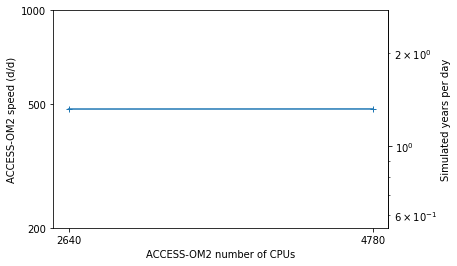

In [11]:
pas.plot_by_xy_labels_fn(
    pas.loglog_om2_speed_by_ncpus,
    "om2_ncpus",
    data=df_bw,
    yticks=[200,500,1000])

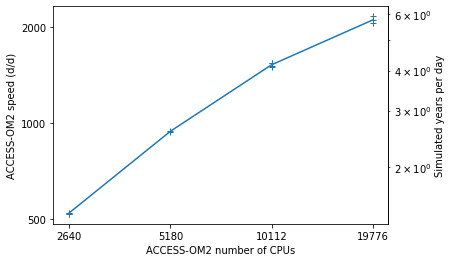

In [12]:
pas.plot_by_xy_labels_fn(
    pas.loglog_om2_speed_by_ncpus,
    "om2_ncpus",
    data=high_ice_ncpus,
    yticks=[500,1000,2000])

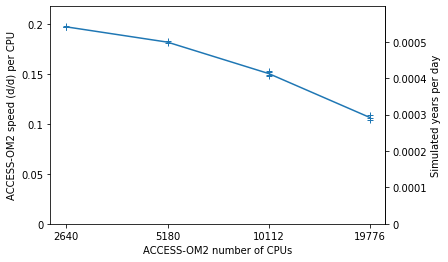

In [13]:
pas.plot_by_xy_labels_fn(
    pas.semilogx_om2_speed_per_cpu_by_ncpus,
    "om2_ncpus", 
    data=high_ice_ncpus,
    yticks=[0,0.05,0.1,0.15,0.2],
    right_yticks=[n/10000.0 for n in range(7)])

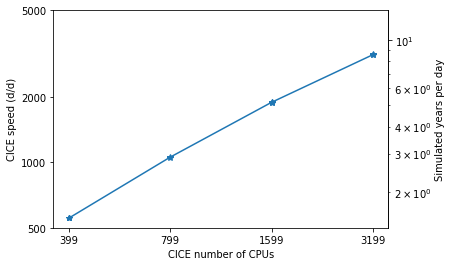

In [14]:
pas.plot_by_xy_labels_fn(
    pas.loglog_ice_speed_by_ncpus, 
    "ice_ncpus", 
    data=high_ice_ncpus,
    yticks=[500,1000,2000,5000],
    right_yticks=[1,2,5,10,20],
    marker='*')

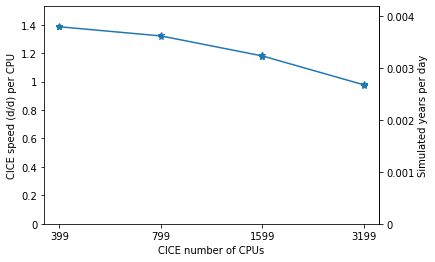

In [15]:
pas.plot_by_xy_labels_fn(
    pas.semilogx_ice_speed_per_cpu_by_ncpus,
    "ice_ncpus",
    data=high_ice_ncpus,
    yticks=[n/5.0 for n in range(8)],
    right_yticks=[n/1000.0 for n in range(8)],
    marker='*')

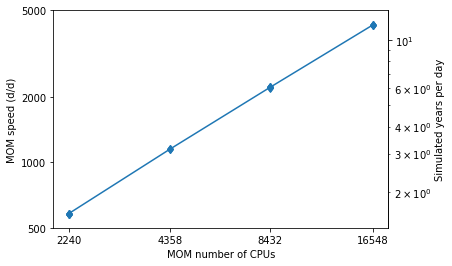

In [16]:
pas.plot_by_xy_labels_fn(
    pas.loglog_ocean_speed_by_ncpus,
    "ocean_ncpus", 
    data=high_ice_ncpus,
    yticks=[500,1000,2000,5000],
    right_yticks=[1,2,5,10],
    marker='d')

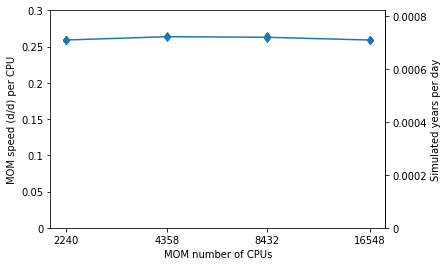

In [17]:
pas.plot_by_xy_labels_fn(
    pas.semilogx_ocean_speed_per_cpu_by_ncpus,    
    "ocean_ncpus",
    data=high_ice_ncpus,
    right_axis_fn=pra.plot_right_axis_yd,
    yticks=[n/20.0 for n in range(7)],
    right_yticks=[n/5000.0 for n in range(5)],
    marker='d')

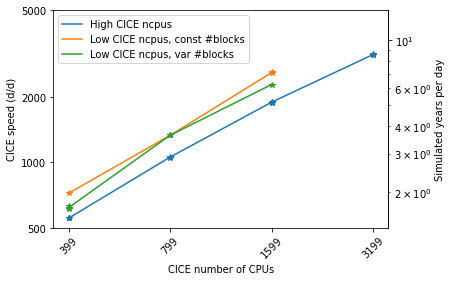

In [18]:
plot_ice_block_comparison(
    pas.loglog_ice_speed_by_ncpus,
    "ice_ncpus", 
    df,
    yticks=[500,1000,2000,5000],
    right_axis_fn=pra.plot_right_axis_yd,
    right_yticks=[1,2,5,10],
    marker='*')

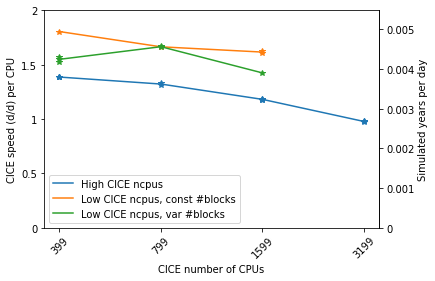

In [19]:
plot_ice_block_comparison(
    pas.semilogx_ice_speed_per_cpu_by_ncpus,
    "ice_ncpus", 
    df,
    yticks=[0,0.5,1,1.5,2],
    right_yticks=[n/1000.0 for n in range(6)],
    right_axis_fn=pra.plot_right_axis_yd,
    marker='*')

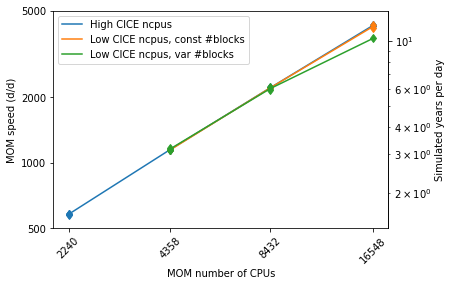

In [20]:
plot_ice_block_comparison(
    pas.loglog_ocean_speed_by_ncpus,
    "ocean_ncpus",
    df,
    yticks=[500,1000,2000,5000],
    right_yticks=[1,2,5,10],
    right_axis_fn=pra.plot_right_axis_yd,
    marker='d')

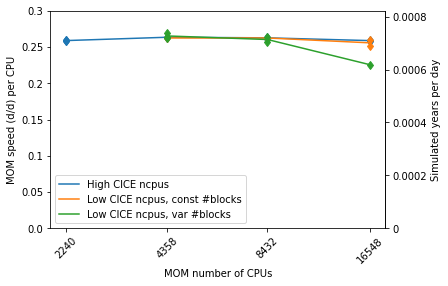

In [21]:
plot_ice_block_comparison(
    pas.semilogx_ocean_speed_per_cpu_by_ncpus,
    "ocean_ncpus",
    df,
    yticks=[n/20.0 for n in range(7)],
    right_yticks=[n/5000.0 for n in range(5)],
    right_axis_fn=pra.plot_right_axis_yd,
    marker='d')

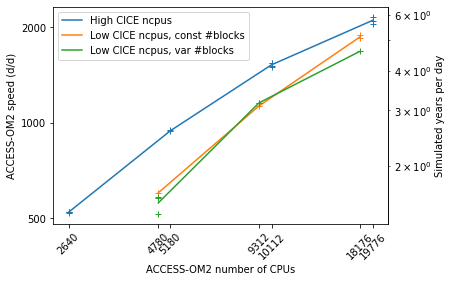

In [22]:
plot_ice_block_comparison(
    pas.loglog_om2_speed_by_ncpus,
    "om2_ncpus",
    df,
    yticks=[500,1000,2000],
    right_yticks=[1, 2, 5],
    right_axis_fn=pra.plot_right_axis_yd)

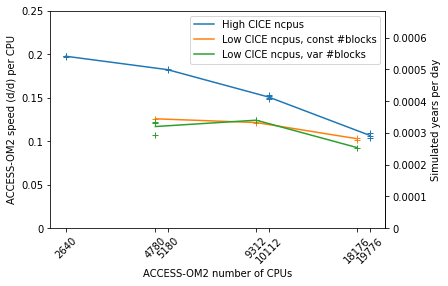

In [23]:
plot_ice_block_comparison(
    pas.semilogx_om2_speed_per_cpu_by_ncpus,
    "om2_ncpus",
    df,
    yticks=[0,0.05,0.1,0.15,0.2,0.25],
    right_yticks=[n/10000.0 for n in range(7)],
    right_axis_fn=pra.plot_right_axis_yd)

In [24]:
def get_mean(df, x, y):
    mean_y_by_x=dict()
    group_ncpus=df.groupby(x)
    for name, group in group_ncpus:
        means = group.groupby(x)[y].mean()
        mean_y_by_x[name] = means[name]
    return mean_y_by_x

In [25]:
def round_dict(d, n):
    return {k: round(v, n) for k, v in d.items()}

In [26]:
def days_to_years_dict(d):
    return {k: days_to_gregorian_years(v) for k, v in d.items()}

In [27]:
print("ACCESS-OM2 speed per CPU")
print("High")
high_mean = get_mean(high_ice_ncpus,"om2_ncpus","OM2 speed per cpu")
print("d/d")
print(round_dict(high_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(high_mean), 5))                        
print("Const")
low_const_mean = get_mean(low_ncpus_const_blocks,"om2_ncpus","OM2 speed per cpu")
print("d/d")
print(round_dict(low_const_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(low_const_mean), 5))                        
print("Var")
low_var_mean = get_mean(low_ncpus_var_blocks,"om2_ncpus","OM2 speed per cpu")
print("d/d")
print(round_dict(low_var_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(low_var_mean), 5))                        

ACCESS-OM2 speed per CPU
High
d/d
{2640: 0.2, 5180: 0.18, 10112: 0.15, 19776: 0.11}
Y/d
{2640: 0.00054, 5180: 0.0005, 10112: 0.00041, 19776: 0.00029}
Const
d/d
{4780: 0.13, 9312: 0.12, 18176: 0.1}
Y/d
{4780: 0.00034, 9312: 0.00033, 18176: 0.00028}
Var
d/d
{4780: 0.12, 9312: 0.12, 18176: 0.09}
Y/d
{4780: 0.00032, 9312: 0.00034, 18176: 0.00025}


In [28]:
print("MOM speed per CPU")
print("High")
high_mean = get_mean(high_ice_ncpus,"ocean_ncpus","Ocean speed per cpu")
print("d/d")
print(round_dict(high_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(high_mean), 5))                        
print("Const")
low_const_mean = get_mean(low_ncpus_const_blocks,"ocean_ncpus","Ocean speed per cpu")
print("d/d")
print(round_dict(low_const_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(low_const_mean), 5))                        
print("Var")
low_var_mean = get_mean(low_ncpus_var_blocks,"ocean_ncpus","Ocean speed per cpu")
print("d/d")
print(round_dict(low_var_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(low_var_mean), 5)) 

MOM speed per CPU
High
d/d
{2240: 0.26, 4358: 0.26, 8432: 0.26, 16548: 0.26}
Y/d
{2240: 0.00071, 4358: 0.00072, 8432: 0.00072, 16548: 0.00071}
Const
d/d
{4358: 0.26, 8432: 0.26, 16548: 0.26}
Y/d
{4358: 0.00072, 8432: 0.00072, 16548: 0.0007}
Var
d/d
{4358: 0.27, 8432: 0.26, 16548: 0.23}
Y/d
{4358: 0.00073, 8432: 0.00071, 16548: 0.00062}


In [29]:
print("CICE speed per CPU")
print("High")
high_mean = get_mean(high_ice_ncpus,"ice_ncpus","Ice speed per cpu")
print("d/d")
print(round_dict(high_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(high_mean), 4))                        
print("Const")
low_const_mean = get_mean(low_ncpus_const_blocks,"ice_ncpus","Ice speed per cpu")
print("d/d")
print(round_dict(low_const_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(low_const_mean), 4))                        
print("Var")
low_var_mean = get_mean(low_ncpus_var_blocks,"ice_ncpus","Ice speed per cpu")
print("d/d")
print(round_dict(low_var_mean,2))
print("Y/d")
print(round_dict(days_to_years_dict(low_var_mean), 4)) 

CICE speed per CPU
High
d/d
{399: 1.39, 799: 1.32, 1599: 1.18, 3199: 0.98}
Y/d
{399: 0.0038, 799: 0.0036, 1599: 0.0032, 3199: 0.0027}
Const
d/d
{399: 1.8, 799: 1.66, 1599: 1.62}
Y/d
{399: 0.0049, 799: 0.0046, 1599: 0.0044}
Var
d/d
{399: 1.55, 799: 1.66, 1599: 1.42}
Y/d
{399: 0.0042, 799: 0.0046, 1599: 0.0039}


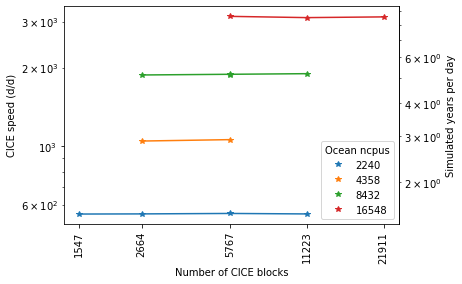

In [30]:
pas.loglog_ice_speed_by_ocean_ncpus_nbr_blocks(high_ice_ncpus, marker='*')

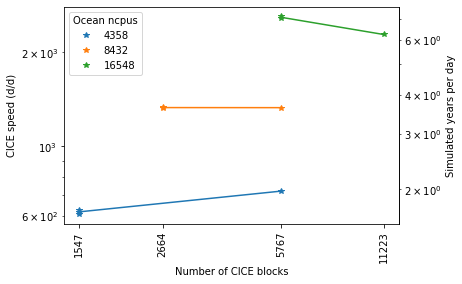

In [31]:
pas.loglog_ice_speed_by_ocean_ncpus_nbr_blocks(low_ice_ncpus, marker='*')

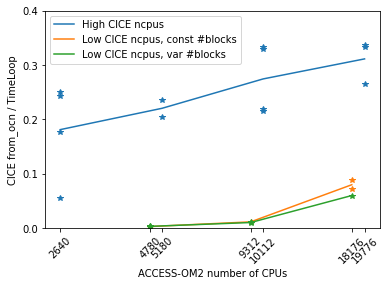

In [32]:
yticks=[n/10.0 for n in range(5)]
plot_ice_block_comparison(
    pas.semilogx_relative_ice_from_ocn_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=yticks,
    marker='*')

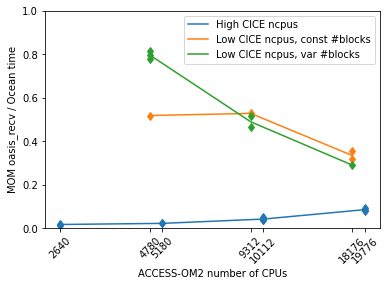

In [33]:
plot_ice_block_comparison(
    pas.semilogx_relative_ocean_oasis_recv_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[n/5.0 for n in range(6)],
    marker='d')

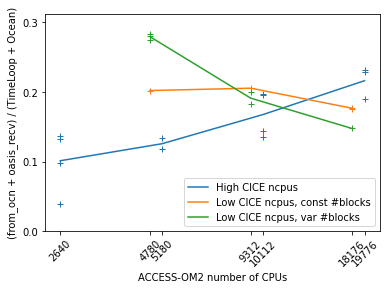

In [34]:
plot_ice_block_comparison(
    pas.semilogx_relative_wait_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[n/10.0 for n in range(4)])

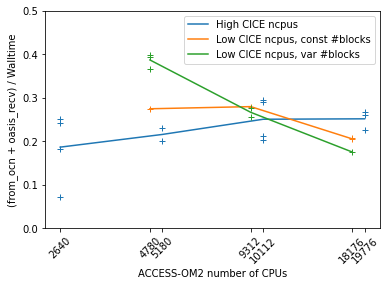

In [35]:
plot_ice_block_comparison(
    pas.semilogx_walltime_wait_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[n/10.0 for n in range(6)])

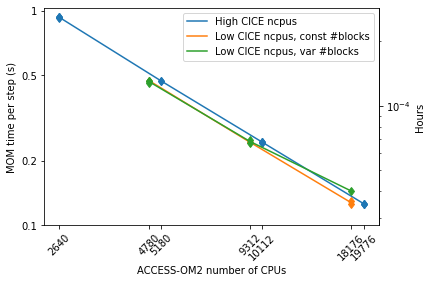

In [36]:
plot_ice_block_comparison(
    pas.loglog_ocean_time_per_step_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[0.1,0.2,0.5,1],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='d')

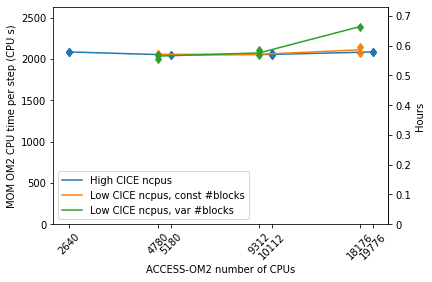

In [37]:
plot_ice_block_comparison(
    pas.semilogx_ocean_cpu_time_per_step_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[],
    right_yticks=[n/10.0 for n in range(8)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='d')

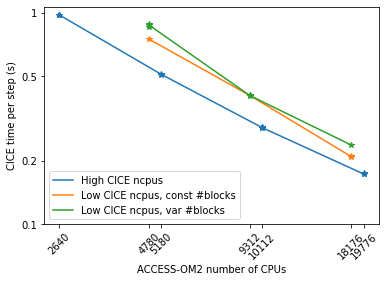

In [38]:
plot_ice_block_comparison(
    pas.loglog_ice_time_per_step_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[0.1,0.2,0.5,1],
    right_axis_fn=pra.no_right_axis,
    marker='*')

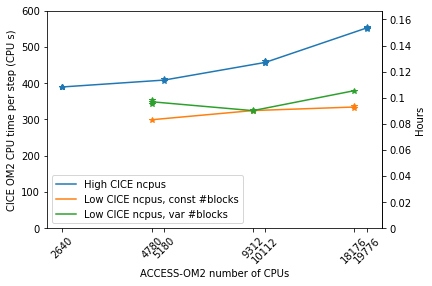

In [39]:
plot_ice_block_comparison(
    pas.semilogx_ice_cpu_time_per_step_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[100*n for n in range(7)],
    right_yticks=[n/50.0 for n in range(9)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='*')

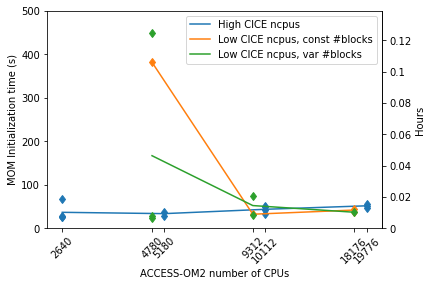

In [40]:
plot_ice_block_comparison(
    pas.semilogx_ocean_init_time_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[100*n for n in range(6)],
    right_yticks=[n/50.0 for n in range(9)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='d')

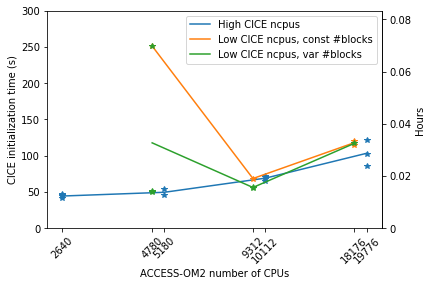

In [41]:
plot_ice_block_comparison(
    pas.semilogx_ice_init_time_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[50*n for n in range(7)],
    right_yticks=[n/50.0 for n in range(5)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='*')

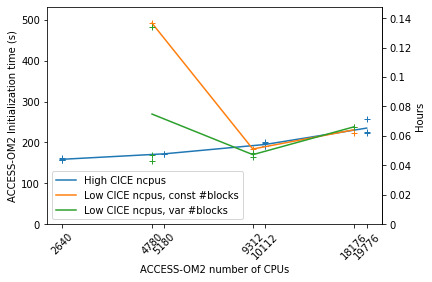

In [42]:
plot_ice_block_comparison(
    pas.semilogx_om2_init_time_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[100*n for n in range(6)],
    right_yticks=[n/50.0 for n in range(8)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='+')

In [43]:
max_allowed_init_time = 300.0

In [44]:
df_fast_init = df[df["Initialization"] <= max_allowed_init_time]
df_slow_init = df[df["Initialization"] > max_allowed_init_time]
df = df_fast_init

In [45]:
high_ice_ncpus=df[df["ocean_ncpus"] / df["ice_ncpus"] <= ocean_cice_ratio_middle]
low_ice_ncpus=df[df["ocean_ncpus"] / df["ice_ncpus"] > ocean_cice_ratio_middle]

In [46]:
low_ncpus_const_blocks=low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] == const_ice_nbr_blocks]
low_ncpus_var_blocks=low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] != const_ice_nbr_blocks]

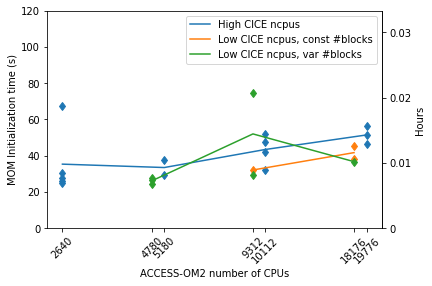

In [47]:
plot_ice_block_comparison(
    pas.semilogx_ocean_init_time_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[20*n for n in range(7)],
    right_yticks=[n/100.0 for n in range(4)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='d')

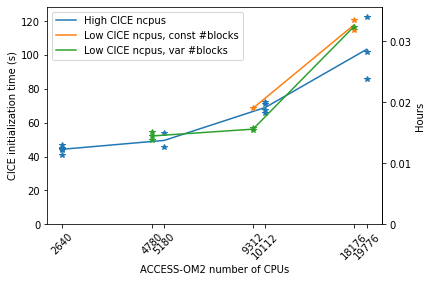

In [48]:
plot_ice_block_comparison(
    pas.semilogx_ice_init_time_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[20*n for n in range(7)],
    right_yticks=[n/100.0 for n in range(4)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='*')

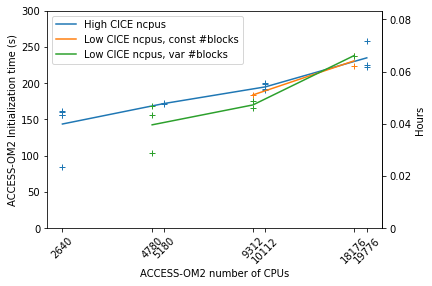

In [49]:
plot_ice_block_comparison(
    pas.semilogx_om2_init_time_by_om2_ncpus,
    "om2_ncpus", 
    df,
    yticks=[50*n for n in range(7)],
    right_yticks=[n/50.0 for n in range(5)],
    right_axis_fn=pra.plot_right_axis_sh,
    marker='+')

In [50]:
df_slow_init["Initialization"]

9     483.450672
12    491.690354
Name: Initialization, dtype: float64